In [76]:
import nltk
import random
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/varun/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package stopwords to /home/varun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
"""
    Fetching the appropriate fields from the data
"""
documents=[(list(movie_reviews.words(fileid)),category)
          for category in movie_reviews.categories()
          for fileid in movie_reviews.fileids(category)]

In [68]:
#Shuffling the data for reducing the baising which one get while trainging the classifier
random.shuffle(documents)

In [69]:
all_words=[]
#Converting the dataset into the lower form dataset
for w in movie_reviews.words():
    all_words.append(w.lower())

#Using FrequencyDistribution to check frequency of words in the data
all_words=nltk.FreqDist(all_words)

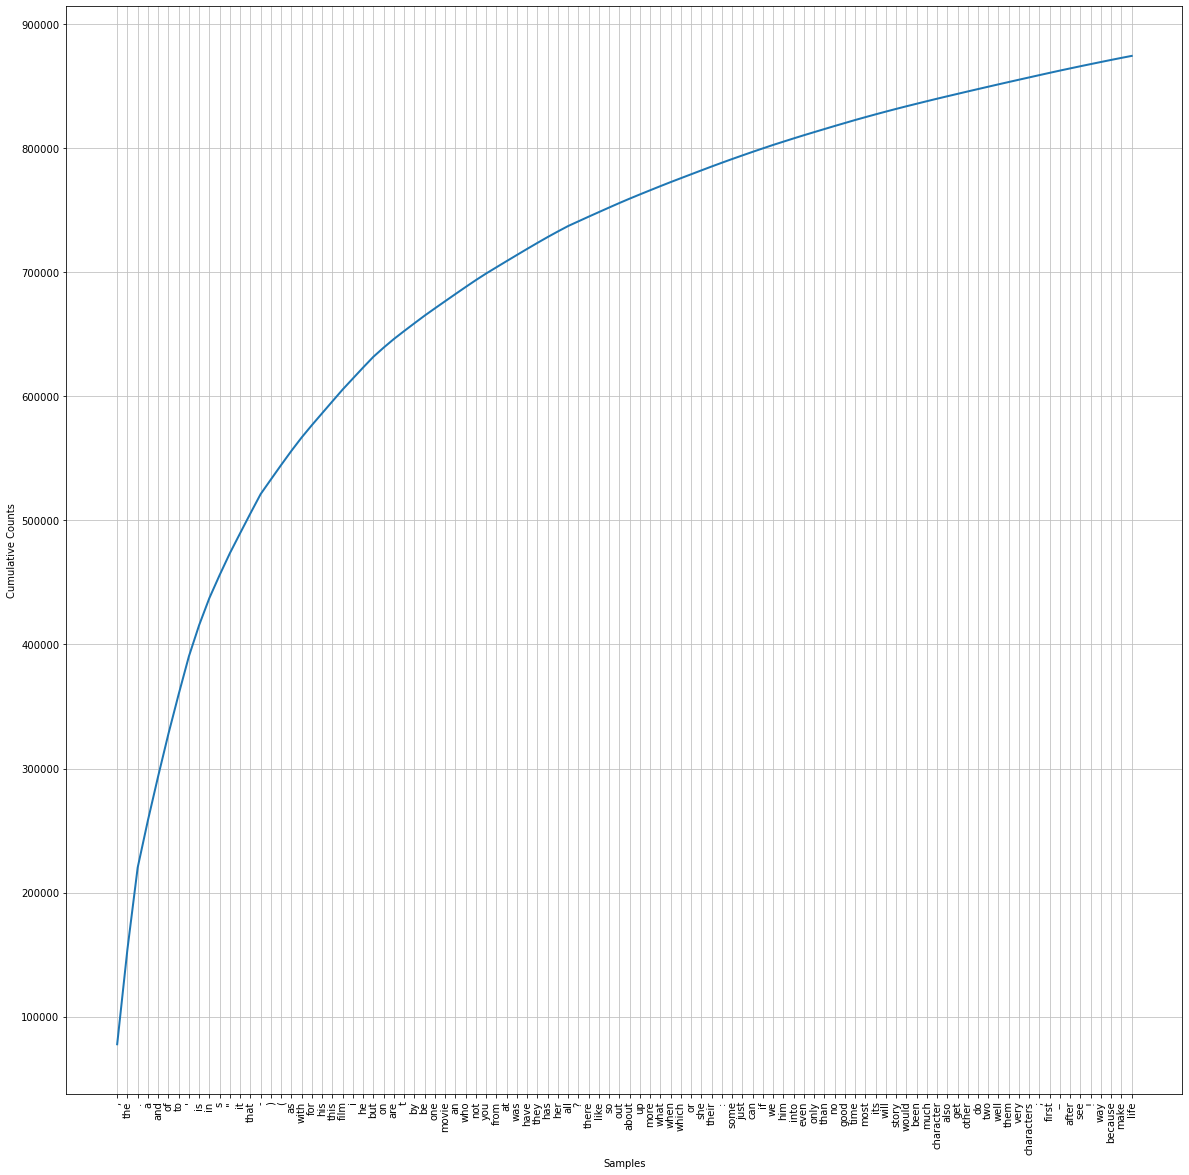

In [70]:
#Plotting the first 100 most frequent common words
plt.figure(figsize=(20,20))

all_words.plot(100,cumulative=True)

In [71]:
# #creating the list of first 2500 common words
# word_features=list(all_words.keys())[:2500]
# # list(all_words.items())[:10]

In [72]:
# #Function for creating the feature dataset
# """
#      Here using TOP-N-WORD approach for feature extraction
# """
# def features_finder(doc):
#     words=set(doc)
#     features={}
#     for w in word_features:
#         features[w]=(w in words)
        
#     return features

In [ ]:
# feature=[(features_finder(rev),category) for(rev,category) in documents]

In [129]:
"""
Using Bag Of Word Feature approach for feature extraction 

"""

positive_review=[]
for fileid in movie_reviews.fileids('pos'):
    words=movie_reviews.words(fileid)
    positive_review.append(words)

negative_review=[]

for fileid in movie_reviews.fileids('neg'):
    word=movie_reviews.words(fileid)
    negative_review.append(word)




In [74]:
stopword_english=stopwords.words('english')

In [92]:
def features_finder(doc):
    word_clean=[]
    
    for word in doc:
            word=word.lower()
            if word not in stopword_english and word not in string.punctuation:
                word_clean.append(word)
    word_dictonary=dict([word,True] for word in word_clean)
    return word_dictonary

In [131]:
positive_review_set=[]
for word in positive_review:
    positive_review_set.append((features_finder(word),'pos'))
    
negative_review_set=[]
for word in negative_review:
    negative_review_set.append((features_finder(word),'neg'))



In [95]:
# #Training and testing dataset is being created
# training_set=feature[:1800]
# test_set=feature[1800:]

In [96]:
random.shuffle(positive_review_set)
random.shuffle(negative_review_set)


In [97]:
training_set=positive_review_set[:800]+negative_review_set[:800]
test_set=positive_review_set[800:]+negative_review_set[800:]


In [98]:
#NaiveBayesClassifier for calssification
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [99]:
print("NaiveBayesClassifier Acuuracy",(nltk.classify.accuracy(classifier,test_set))*100)

NaiveBayesClassifier Acuuracy 69.25


In [100]:
classifier.show_most_informative_features()

Most Informative Features
             outstanding = True              pos : neg    =     13.9 : 1.0
                  seagal = True              neg : pos    =     11.7 : 1.0
                captures = True              pos : neg    =     11.4 : 1.0
               stupidity = True              neg : pos    =     11.0 : 1.0
              astounding = True              pos : neg    =     11.0 : 1.0
                 tribute = True              pos : neg    =     11.0 : 1.0
                  avoids = True              pos : neg    =     10.3 : 1.0
                poignant = True              pos : neg    =     10.2 : 1.0
                   sucks = True              neg : pos    =     10.2 : 1.0
               ludicrous = True              neg : pos    =      9.9 : 1.0


In [101]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC,NuSVC

In [102]:
#Using Various Machine Learning Algorithm on the dataset 
MNB_classfier=SklearnClassifier(MultinomialNB())
MNB_classfier.train(training_set)

BNB_classifier=SklearnClassifier(BernoulliNB())
BNB_classifier.train(training_set)

Logistic_calssifier=SklearnClassifier(LogisticRegression())
Logistic_calssifier.train(training_set)

SGD_classifier=SklearnClassifier(SGDClassifier())
SGD_classifier.train(training_set)

SVC_classifier=SklearnClassifier(SVC())
SVC_classifier.train(training_set)

LineraSVC_classifer=SklearnClassifier(LinearSVC())
LineraSVC_classifer.train(training_set)

NuSVC_classifer=SklearnClassifier(NuSVC())
NuSVC_classifer.train(training_set)



<SklearnClassifier(NuSVC())>

In [103]:
"""
    Printing the Accuracy of the Respective Algorithm on the Dataset
"""
print("MNB_classfier Acuuracy",(nltk.classify.accuracy(MNB_classfier,test_set))*100)
print("BNB_classifier Acuuracy",(nltk.classify.accuracy(BNB_classifier,test_set))*100)
print("SGD_classifier Acuuracy",(nltk.classify.accuracy(SGD_classifier,test_set))*100)
print("SVC_classifier Acuuracy",(nltk.classify.accuracy(SVC_classifier,test_set))*100)
print("LinearSVC_classifer Acuuracy",(nltk.classify.accuracy(LineraSVC_classifer,test_set))*100)
print("NuSVC_classifer Acuuracy",(nltk.classify.accuracy(NuSVC_classifer,test_set))*100)


MNB_classfier Acuuracy 84.0
BNB_classifier Acuuracy 82.0
SGD_classifier Acuuracy 85.25
SVC_classifier Acuuracy 86.5
LinearSVC_classifer Acuuracy 84.0
NuSVC_classifer Acuuracy 87.0


In [104]:
# custom_review="I hated the film. It was a disaster. Poor direction, bad acting."

In [105]:
# custom_review_token=nltk.word_tokenize(custom_review)
# custom_review_set=features_finder(custom_review_token)

In [106]:
# print(NuSVC_classifer.classify(custom_review_set))

neg


In [176]:
def checking_function(review):
    review_token=nltk.word_tokenize(review)
    review_set=features_finder(review_token)
    
    print("Sentiment observed by the NaiveBayesClassifier algo: ",classifier.classify(review_set))
    prob_classify=classifier.prob_classify(custom_review_set)
    print("Probability of the Positive:Negative sentiment predicted by the respective algo for the review: ", prob_classify.prob('pos'), ":", prob_classify.prob('neg'))
    
    print("\n\n")
    
    print("Sentiment observed by the MNB_classfier algo: ",MNB_classfier.classify(review_set))
    prob_classify=MNB_classfier.prob_classify(custom_review_set)
    print("Probability of the Positive:Negative sentiment predicted by the respective algo for the review: ", prob_classify.prob('pos'), ":", prob_classify.prob('neg'))
    
    print("\n\n")

    
    print("Sentiment observed by the BNB_classifier Algo: ",BNB_classifier.classify(review_set))
#     prob_classify=SVC_classifier.prob_classify(custom_review_set)
#     print("Probability of the Positive:Negative sentiment predicted by the respective algo for the review: ", prob_classify.prob('pos'), ":", prob_classify.prob('neg'))
    
    print("\n\n")

    
    print("Sentiment observed by the BNB_classifier Algo: ",BNB_classifier.classify(review_set))
    prob_classify=BNB_classifier.prob_classify(custom_review_set)
    print("Probability of the Positive:Negative sentiment predicted by the respective algo for the review: ", prob_classify.prob('pos'), ":", prob_classify.prob('neg'))
  
    print("\n\n")


    print("Sentiment observed by the SGD_classifier Algo: ",SGD_classifier.classify(review_set))
#     prob_classify=SGD_classifier.prob_classify(custom_review_set)
#     print("Probability of the Positive:Negative sentiment predicted by the respective algo for the review: ", prob_classify.prob('pos'), ":", prob_classify.prob('neg'))
    
    print("\n\n")

    
    print("Sentiment observed by the SVC_classifier Algo: ",SVC_classifier.classify(review_set))
#     prob_classify=SVC_classifier.prob_classify(custom_review_set)
#     print("Probability of the Positive:Negative sentiment predicted by the respective algo for the review: ", prob_classify.prob('pos'), ":", prob_classify.prob('neg'))
    
    print("\n\n")
    
    print("Sentiment observed by the LineraSVC_classifer Algo: ",LineraSVC_classifer.classify(review_set))
#     prob_classify=LineraSVC_classifer.prob_classify(custom_review_set)
#     print("Probability of the Positive:Negative sentiment predicted by the respective algo for the review: ", prob_classify.prob('pos'), ":", prob_classify.prob('neg'))
    
    print("\n\n")
    
    
    print("Sentiment observed by the NuSVC_classifer Algo: ",NuSVC_classifer.classify(review_set))
#     prob_classify=NuSVC_classifer.prob_classify(custom_review_set)
#     print("Probability of the Positive:Negative sentiment predicted by the respective algo for the review: ", prob_classify.prob('pos'), ":", prob_classify.prob('neg'))
    
    
    

In [177]:
checking_function("It was a wonderful and amazing movie. I loved it. Best direction, good acting.")

Sentiment observed by the NaiveBayesClassifier algo:  pos
Probability of the Positive:Negative sentiment predicted by the respective algo for the review:  0.5769230769230768 : 0.42307692307692296



Sentiment observed by the MNB_classfier algo:  pos
Probability of the Positive:Negative sentiment predicted by the respective algo for the review:  0.554824328957194 : 0.44517567104280564



Sentiment observed by the BNB_classifier Algo:  neg



Sentiment observed by the BNB_classifier Algo:  neg
Probability of the Positive:Negative sentiment predicted by the respective algo for the review:  7.675745412898036e-13 : 0.9999999999992042



Sentiment observed by the SGD_classifier Algo:  pos



Sentiment observed by the SVC_classifier Algo:  neg



Sentiment observed by the LineraSVC_classifer Algo:  pos



Sentiment observed by the NuSVC_classifer Algo:  neg


In [178]:
checking_function("I hated the film. It was a disaster. Poor direction, bad acting.")

Sentiment observed by the NaiveBayesClassifier algo:  neg
Probability of the Positive:Negative sentiment predicted by the respective algo for the review:  0.5769230769230768 : 0.42307692307692296



Sentiment observed by the MNB_classfier algo:  neg
Probability of the Positive:Negative sentiment predicted by the respective algo for the review:  0.554824328957194 : 0.44517567104280564



Sentiment observed by the BNB_classifier Algo:  neg



Sentiment observed by the BNB_classifier Algo:  neg
Probability of the Positive:Negative sentiment predicted by the respective algo for the review:  7.675745412898036e-13 : 0.9999999999992042



Sentiment observed by the SGD_classifier Algo:  neg



Sentiment observed by the SVC_classifier Algo:  neg



Sentiment observed by the LineraSVC_classifer Algo:  neg



Sentiment observed by the NuSVC_classifer Algo:  neg
